# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from scipy import stats

2023-05-28 22:50:03.826844: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 22:50:05.451899: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Prepare datasets

In [2]:
df_x = pd.read_csv('../data/dataset_02/data.csv')
df_y = pd.read_csv('../data/dataset_02/answer.csv')

In [3]:
df_x = df_x.drop(labels=['Unnamed: 0'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_y = df_y.drop(labels=['Unnamed: 0'], axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...
48801,-9.63243,9.66777,6.225,-0.19256,0.23003,-14.997
48802,-0.19256,0.23003,-14.997,13.42070,6.56526,1.335
48803,13.42070,6.56526,1.335,-0.19256,0.23003,-14.997
48804,-0.19256,0.23003,-14.997,-13.56919,5.13653,3.807


In [5]:
df = pd.concat([df_x, df_y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-9.63243,9.66777,6.225,-0.19256,0.23003,-14.997
48802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,13.42070,6.56526,1.335
48803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.42070,6.56526,1.335,-0.19256,0.23003,-14.997
48804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,-13.56919,5.13653,3.807


In [6]:
labels = [str(i) for i in range(672)]

In [7]:
df = df.drop_duplicates(subset=labels, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,668,669,670,671,x1,y1,z1,x2,y2,z2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.19873,1.87854,9.801,-0.19256,0.23003,-14.997
19960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,-0.19256,0.23003,-14.997,8.72039,6.20611,10.509
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.72039,6.20611,10.509,-0.19256,0.23003,-14.997
19962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.19256,0.23003,-14.997,2.34033,14.49242,3.081


In [8]:
df_x = df.drop(labels=['x1', 'y1', 'z1', 'x2', 'y2', 'z2'], axis=1)
df_x

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
df_y = df.drop(labels=labels, axis=1)
df_y

,x1,y1,z1,x2,y2,z2
0,0.10871,-0.27960,14.997,10.61088,10.45806,-1.743
1,10.61088,10.45806,-1.743,0.10871,-0.27960,14.997
2,0.10871,-0.27960,14.997,11.83410,1.03286,-9.159
3,11.83410,1.03286,-9.159,0.10871,-0.27960,14.997
4,0.10871,-0.27960,14.997,0.48150,-11.78048,-9.273
...,...,...,...,...,...,...
19959,11.19873,1.87854,9.801,-0.19256,0.23003,-14.997
19960,-0.19256,0.23003,-14.997,8.72039,6.20611,10.509
19961,8.72039,6.20611,10.509,-0.19256,0.23003,-14.997
19962,-0.19256,0.23003,-14.997,2.34033,14.49242,3.081


In [10]:
df_x = np.reshape(df_x.to_numpy(), (-1, 1, 24, 28))
df_x.shape

(19964, 1, 24, 28)

In [11]:
df_y = df_y.to_numpy()
df_y

array([[  0.10871,  -0.2796 ,  14.997  ,  10.61088,  10.45806,  -1.743  ],
       [ 10.61088,  10.45806,  -1.743  ,   0.10871,  -0.2796 ,  14.997  ],
       [  0.10871,  -0.2796 ,  14.997  ,  11.8341 ,   1.03286,  -9.159  ],
       ...,
       [  8.72039,   6.20611,  10.509  ,  -0.19256,   0.23003, -14.997  ],
       [ -0.19256,   0.23003, -14.997  ,   2.34033,  14.49242,   3.081  ],
       [  2.34033,  14.49242,   3.081  ,  -0.19256,   0.23003, -14.997  ]])

In [12]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.9)

train_x, valid_x, train_y, valid_y = train_test_split(train_x,
                                                    train_y,
                                                    test_size=0.33)

In [13]:
print(train_x.shape), print(train_y.shape)
print(valid_x.shape), print(valid_y.shape)
print(test_x.shape), print(test_y.shape)

(12037, 1, 24, 28)
(12037, 6)
(5930, 1, 24, 28)
(5930, 6)
(1997, 1, 24, 28)
(1997, 6)


(None, None)

# CNN

In [ ]:
initializer = tf.keras.initializers.GlorotNormal()

In [18]:
model = keras.Sequential([
    keras.Input(shape=(1, 24, 28)),
    layers.Conv2D(32, (7, 7), activation="relu", data_format='channels_first', kernel_initializer=initializer),
    layers.MaxPooling2D((2, 2), strides=2, kernel_initializer=initializer),
    layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer=initializer),
    layers.MaxPooling2D((2, 2), strides=2, kernel_initializer=initializer),
    layers.Flatten(),
    # layers.Dense(256, activation='relu', kernel_initializer=initializer),
    layers.Dense(128, activation='relu', kernel_initializer=initializer),
    # layers.Dense(64, activation='relu', kernel_initializer=initializer),
    layers.Dense(64, activation='relu', kernel_initializer=initializer),
    layers.Dense(64, activation='relu', kernel_initializer=initializer),
    layers.Dense(64, activation='relu', kernel_initializer=initializer),
    layers.Dense(6, activation='linear', kernel_initializer=initializer),
])

In [19]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanSquaredError()])

In [20]:
checkpoint_name = 'weights/Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_name,
                                             monitor='val_loss',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='auto')
callbacks_list = [checkpoint]

In [22]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [23]:
history = model.fit(train_x,
                    train_y,
                    batch_size=64,
                    epochs=1000,
                    verbose=0,
                    validation_data=(valid_x, valid_y))  # ,
# callbacks=callbacks_list)

2023-05-28 22:53:29.890007: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32355456 exceeds 10% of free system memory.
2023-05-28 22:53:30.043875: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:219] failed to create cublas handle: cublasGetStatusString symbol not found.
2023-05-28 22:53:30.043911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:222] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2023-05-28 22:53:30.043992: W tensorflow/core/kernels/conv_ops_gpu.cc:143] None of the algorithms provided by cuDNN frontend heuristics worked; trying fallback algorithms.  Conv: batch: 64
in_depths: 1
out_depths: 32
in: 24
in: 28
data_format: 1
filter: 7
filter: 7
filter: 1
dilation: 1
dilation: 1
stride: 1
stride: 1
padding: 0
pa

NotFoundError: Graph execution error:

Detected at node 'sequential_1/conv2d_2/Relu' defined at (most recent call last):
    File "/home/mawerid/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/mawerid/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/mawerid/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/mawerid/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/mawerid/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_43681/3095797481.py", line 1, in <module>
      history = model.fit(train_x,
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/mawerid/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d_2/Relu'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng11{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc(4639): 'status'
  Profiling failure on CUDNN engine eng0{}: UNKNOWN: CUDNN_STATUS_ALLOC_FAILED
in tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc(4639): 'status'
	 [[{{node sequential_1/conv2d_2/Relu}}]] [Op:__inference_train_function_3789]

In [ ]:
history.history

{'loss': [120.64645385742188,
  56.30782699584961,
  33.256065368652344,
  22.321170806884766,
  15.127167701721191,
  11.158048629760742,
  8.743058204650879,
  7.135004043579102,
  6.226810455322266,
  5.185906410217285,
  4.448009967803955,
  3.9322752952575684,
  3.47953462600708,
  3.103102684020996,
  2.778594970703125,
  2.566861391067505,
  2.3594446182250977,
  2.127051591873169,
  1.9593608379364014,
  1.8499882221221924,
  1.7502447366714478,
  1.736466407775879,
  1.560158371925354,
  1.4054943323135376,
  1.2935701608657837,
  1.1918413639068604,
  1.108461856842041,
  1.0786526203155518,
  1.0308068990707397,
  1.0177923440933228,
  0.9003455638885498,
  0.8260626196861267,
  0.7301470041275024,
  0.6920977830886841,
  0.6650035381317139,
  0.6306275725364685,
  0.6014245748519897,
  0.5285136699676514,
  0.5550559759140015,
  0.5754742622375488,
  0.5519822239875793,
  0.6084041595458984,
  0.5384311676025391,
  0.44857195019721985,
  0.4062502384185791,
  0.386449277400

Text(0.5, 0, 'Номер эпохи')

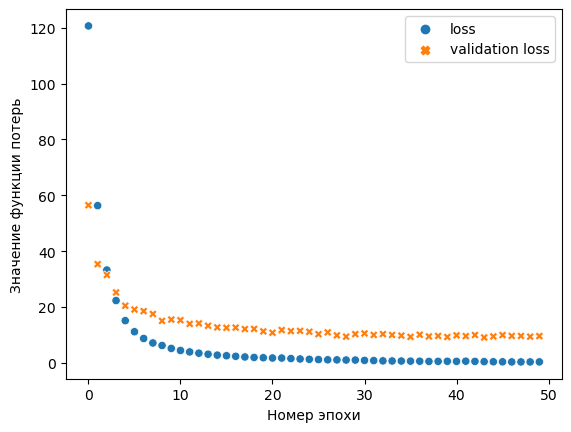

In [ ]:
sb.scatterplot(
    {'loss': history.history['loss'], 'validation loss': history.history['val_loss']})
plt.ylabel("Значение функции потерь")
plt.xlabel("Номер эпохи")

<AxesSubplot:>

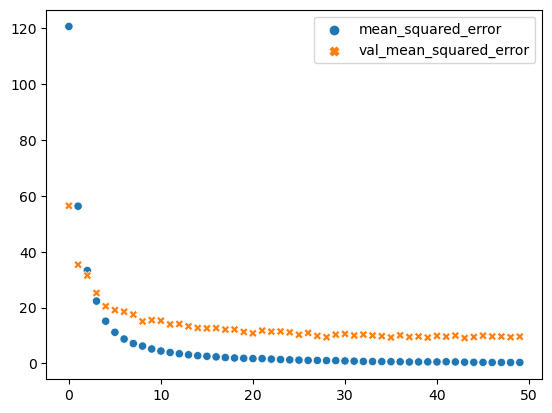

In [ ]:
sb.scatterplot({'mean_squared_error': history.history['mean_squared_error'],
               'val_mean_squared_error': history.history['val_mean_squared_error']})

In [ ]:
# Load wights file of the best model :
wights_file = '../logs/weights_model_01/Weights-049--17.80290.hdf5'  # choose the best checkpoint
model.load_weights(wights_file)  # load it
model.compile(loss=keras.losses.MeanSquaredError(
), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError()])

In [ ]:
model.summary(expand_nested=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 672)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               172288    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)               

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer)
    try:
        print("    ", layer.activation)
    except AttributeError:
        print('   no activation attribute')

0 <keras.layers.reshaping.flatten.Flatten object at 0x7fbcbc0bddf0>
   no activation attribute
1 <keras.layers.core.dense.Dense object at 0x7fbcbc10f6d0>
     <function relu at 0x7fbcc01505e0>
2 <keras.layers.core.dense.Dense object at 0x7fbcbc10faf0>
     <function relu at 0x7fbcc01505e0>
3 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7bb0>
     <function relu at 0x7fbcc01505e0>
4 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7280>
     <function relu at 0x7fbcc01505e0>
5 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7430>
     <function relu at 0x7fbcc01505e0>
6 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7730>
     <function relu at 0x7fbcc01505e0>
7 <keras.layers.core.dense.Dense object at 0x7fbcbc0c7a30>
     <function linear at 0x7fbcc0154040>


# Check accuracy

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 2ms/step - loss: 1.6711 - mean_squared_error: 1.6711
Test loss: 1.6711068153381348
Test accuracy: 1.6711068153381348


In [ ]:
def to_spherical(coor):
    vector = np.array(
        [(coor[3]-coor[0]), (coor[4]-coor[1]), (coor[5]-coor[2])])
    vectorsphere = np.array([np.sqrt((vector**2).sum()), (np.arctan(np.sqrt(
        coor[0]**2 + coor[1]**2)/coor[2])*180/np.pi), (np.arctan(coor[1]/coor[0])*180/np.pi)])
    return vectorsphere

In [ ]:
xtr = model.predict(X_train.iloc[:1])
xtr

1/1 [==============================] - 0s 80ms/step


array([[ 1.115236 , 26.631414 ,  4.094659 ,  7.047685 , -1.2362967,
         2.7913187]], dtype=float32)